<a href="https://colab.research.google.com/github/mhtabkrklt/social-network-ML/blob/main/VK_token_graff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import time

In [ ]:
import numpy as np
import networkx as nx
!apt install libgraphviz-dev
!pip install pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt

%matplotlib inline

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
token='https://oauth.vk.com/authorize?client_id=#######&scope=1073737727&redirect_uri=https://oauth.vk.com/blank.html&display=page&response_type=token&revoke=1'

In [ ]:
data = requests.get(f'https://api.vk.com/method/friends.get?user_ids=oliseenko&v=5.81&access_token={token}') # пример запроса списка друзей

In [ ]:
data.content.decode('utf-8')

'{"error":{"error_code":1116,"error_msg":"Anonymous token is invalid","request_params":[{"key":"user_ids","value":"oliseenko"},{"key":"v","value":"5.81"},{"key":"method","value":"friends.get"},{"key":"oauth","value":"1"}]}}'

In [ ]:
data = requests.get(f'https://api.vk.com/method/users.get?user_id=1&v=5.81&access_token={token}')

In [ ]:
data.content.decode('utf-8')

'{"error":{"error_code":1116,"error_msg":"Anonymous token is invalid","request_params":[{"key":"user_id","value":"1"},{"key":"v","value":"5.81"},{"key":"method","value":"users.get"},{"key":"oauth","value":"1"}]}}'

In [ ]:
#функция для запроса и обработки данных
def call_method(ref: str):
    data = requests.get(ref)
    txt = data.content.decode('utf-8')
    try:
        return json.loads(txt)['response']
    except:
        print(data)
        return {}

In [ ]:
call_method(f'https://api.vk.com/method/users.get?user_ids=1&v=5.81&access_token={token}')

<Response [200]>


{}

In [ ]:
jsonF=call_method(f'https://api.vk.com/method/users.get?user_id=8126979&fields=universities,occupation,sex&v=5.81&access_token={token}')
json

<Response [200]>


<module 'json' from '/usr/lib/python3.10/json/__init__.py'>

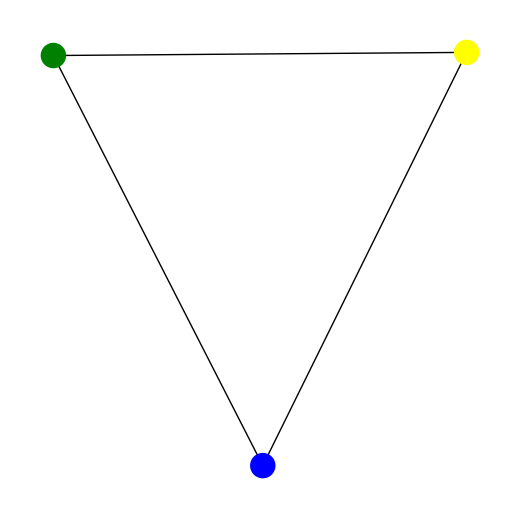

In [ ]:
# пример раскраски вершин графа
graph = nx.from_numpy_array(
    np.array([[0,1,1],
     [1,0,1],
      [1,1,0]]))

plt.figure(figsize=(5, 5))
pos=graphviz_layout(graph)

nx.draw(graph, pos, node_color= ['green', 'yellow','blue'], node_size=300)

In [ ]:
pip install vk_api

Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.


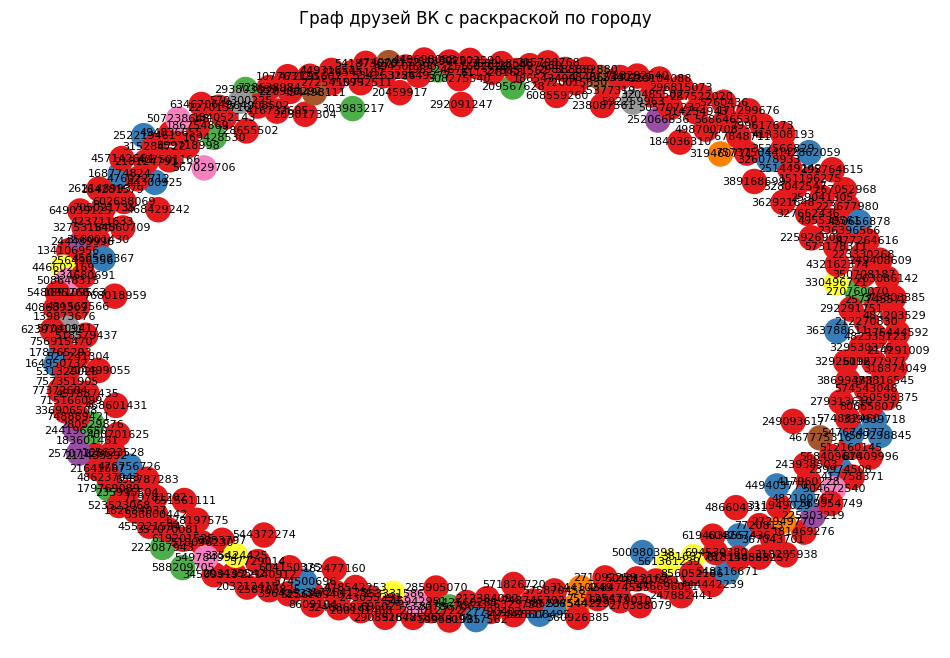

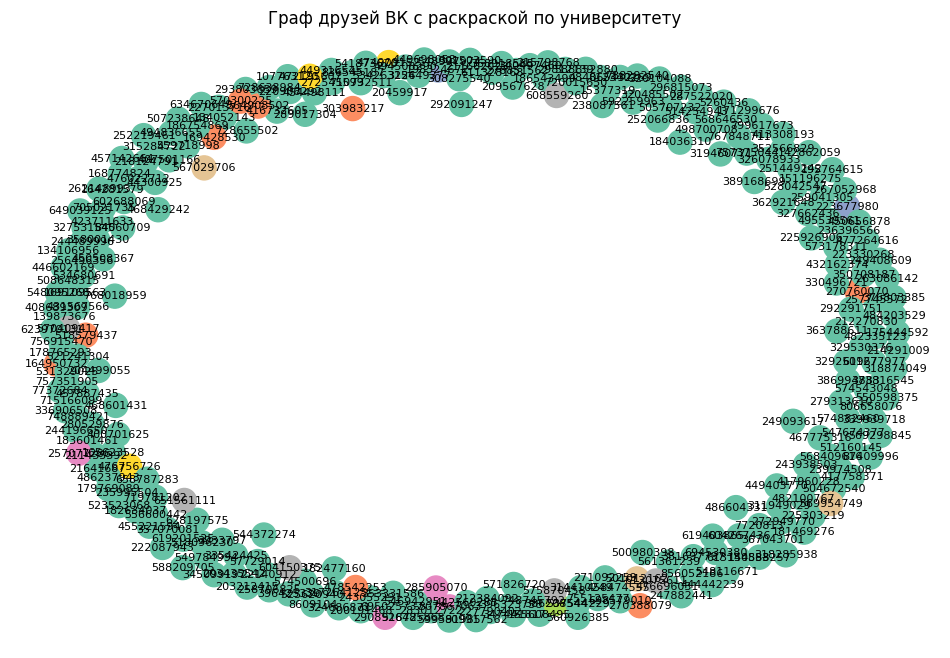

In [ ]:
import vk_api
import networkx as nx
import matplotlib.pyplot as plt
vk_session = vk_api.VkApi(token='vk1.a.Uiw_uktKrJ-PE-ZWiU1b14hFIU8FM3zk8oRBsFsrGpQ6qdUczbpDNTGC2FrODKc23yzWnfTzZtQvpOGGW2AsmjH2_TrS8Dw76vO0RW0NPmJe45_eFdqM2BVsHaNlOdKhAt8hixFF8PXzWXaqWQDSq2Icw_yk-hcWVHFVD7kF3l9kcVp5-HJlX3Q9EYWte8Q_3gAZKnhn__2CQobbGazC8w')
vk = vk_session.get_api()
friends = vk.friends.get(fields=['city', 'universities'])['items']
G = nx.Graph()
for friend in friends:
    user_id = friend['id']
    name = f"{friend.get('first_name', '')} {friend.get('last_name', '')}"
    city = friend.get('city', {}).get('title', 'Не указан')
    university = friend.get('universities')[0]['name'] if friend.get('universities') else 'Не указан'
    G.add_node(user_id, label=name, city=city, university=university)

N = 50

for friend in friends[:N]:
    user_id = friend['id']
    try:
        mutual_friends = vk.friends.getMutual(target_uid=user_id)
        for mutual_friend_id in mutual_friends:
            if G.has_node(mutual_friend_id):
                G.add_edge(user_id, mutual_friend_id)
    except vk_api.exceptions.ApiError as e:
        print(f"Ошибка: {e}")
        continue

city_colors = {}
university_colors = {}
color_index = 0

for node in G.nodes(data=True):
    city = node[1]['city']
    university = node[1]['university']
    if city not in city_colors:
        city_colors[city] = color_index
        color_index += 1
    if university not in university_colors:
        university_colors[university] = color_index
        color_index += 1

city_color_map = [city_colors[G.nodes[node]['city']] for node in G.nodes()]
university_color_map = [university_colors[G.nodes[node]['university']] for node in G.nodes()]
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)

nx.draw_networkx_nodes(G, pos, node_color=city_color_map, cmap=plt.cm.Set1, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Граф друзей ВК с раскраской по городу")
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_color=university_color_map, cmap=plt.cm.Set2, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Граф друзей ВК с раскраской по университету")
plt.axis('off')
plt.show()

In [ ]:
import requests
token = "vk1.a.jqfWi4IifYEvVKzpWTGLMB8abzrCxUgWo3d91zqbxpDbYS1Vhlg60dRo9x2wl9A3YdeSaR0zArZq5RlvWjodTt-EWkDrIHjD_iM7nfK3omWGeBGF0w01BUTOiQ1vOZGJobb2RMS1bQUoMvcbMZo4S0xTm76kK4BQt1xJAvS6wNM-JslAxBmbk5nN9ti1E-xM83HqIH9xo2gtYKcCS9_10Q&expires_in"
base_url = "https://api.vk.com/method"
r = requests.get(f"{base_url}/users.get?user_ids=1&fields=bdate&access_token={token}&v=5.80")
r.json()


{'error': {'error_code': 8,
  'error_msg': 'Invalid request: versions below 5.81 are deprecated. Version param should be passed as "v". "version" param is invalid and not supported. For more information go to https://vk.com/dev/constant_version_updates',
  'request_params': [{'key': 'user_ids', 'value': '1'},
   {'key': 'fields', 'value': 'bdate'},
   {'key': 'expires_in', 'value': ''},
   {'key': 'v', 'value': '5.80'},
   {'key': 'method', 'value': 'users.get'},
   {'key': 'oauth', 'value': '1'}]}}

Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.


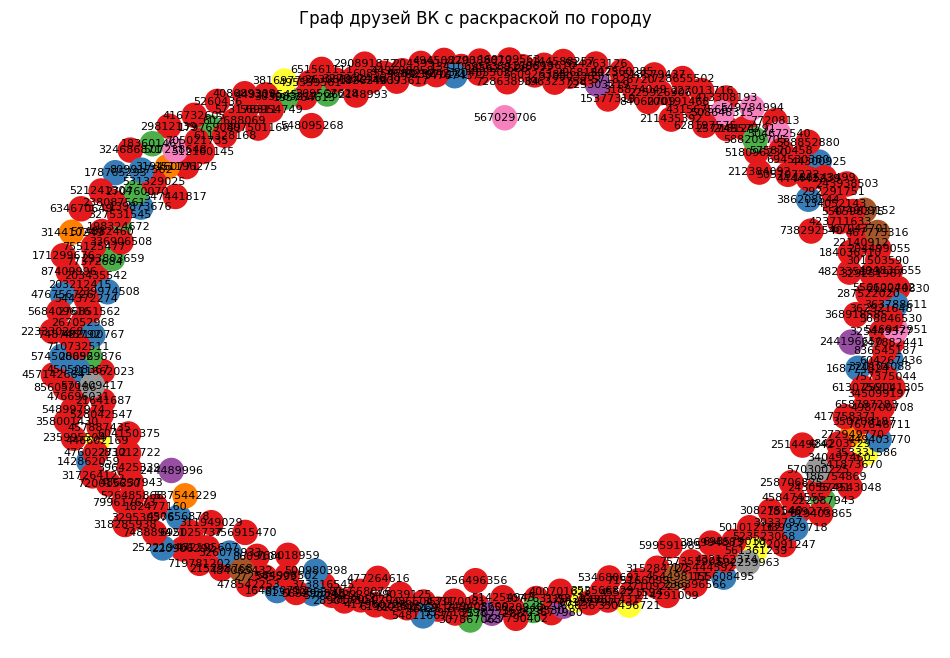

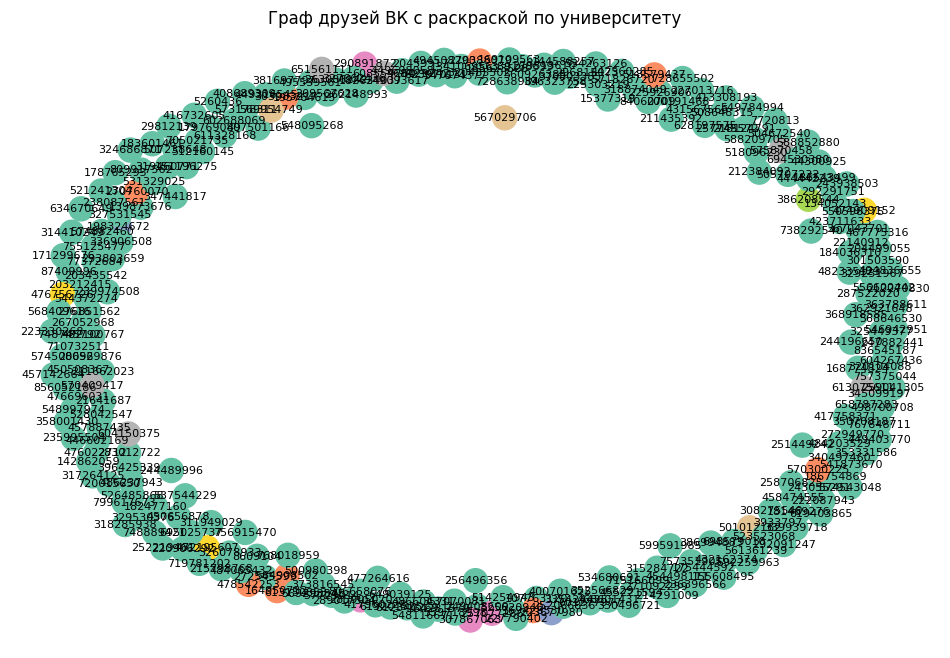

In [ ]:
import vk_api
import networkx as nx
import matplotlib.pyplot as plt

# Токен доступа
token = 'vk1.a.Uiw_uktKrJ-PE-ZWiU1b14hFIU8FM3zk8oRBsFsrGpQ6qdUczbpDNTGC2FrODKc23yzWnfTzZtQvpOGGW2AsmjH2_TrS8Dw76vO0RW0NPmJe45_eFdqM2BVsHaNlOdKhAt8hixFF8PXzWXaqWQDSq2Icw_yk-hcWVHFVD7kF3l9kcVp5-HJlX3Q9EYWte8Q_3gAZKnhn__2CQobbGazC8w'

# Авторизация через токен
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

# Получение списка друзей с информацией о городе и университете
friends = vk.friends.get(fields=['city', 'universities'])['items']

# Создание графа
G = nx.Graph()

# Добавление вершин в граф (друзей)
for friend in friends:
    user_id = friend['id']
    name = f"{friend.get('first_name', '')} {friend.get('last_name', '')}"
    city = friend.get('city', {}).get('title', 'Не указан')
    university = friend.get('universities')[0]['name'] if friend.get('universities') else 'Не указан'
    G.add_node(user_id, label=name, city=city, university=university)

# Добавление ребер между друзьями, которые также являются друзьями друг друга
N = 50  # Ограничение для API запросов

for friend in friends[:N]:
    user_id = friend['id']
    try:
        mutual_friends = vk.friends.getMutual(target_uid=user_id)
        for mutual_friend_id in mutual_friends:
            if G.has_node(mutual_friend_id):
                G.add_edge(user_id, mutual_friend_id)
    except vk_api.exceptions.ApiError as e:
        print(f"Ошибка: {e}")
        continue

# Создание цветовых карт для раскраски вершин по городу и университету
city_colors = {}
university_colors = {}
color_index = 0

for node in G.nodes(data=True):
    city = node[1]['city']
    university = node[1]['university']
    if city not in city_colors:
        city_colors[city] = color_index
        color_index += 1
    if university not in university_colors:
        university_colors[university] = color_index
        color_index += 1

# Присвоение цвета вершинам по признаку города
city_color_map = [city_colors[G.nodes[node]['city']] for node in G.nodes()]
# Присвоение цвета вершинам по признаку университета
university_color_map = [university_colors[G.nodes[node]['university']] for node in G.nodes()]

# Визуализация графа с раскраской по городу
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)

nx.draw_networkx_nodes(G, pos, node_color=city_color_map, cmap=plt.cm.Set1, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Граф друзей ВК с раскраской по городу")
plt.axis('off')
plt.show()

# Визуализация графа с раскраской по университету
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_color=university_color_map, cmap=plt.cm.Set2, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Граф друзей ВК с раскраской по университету")
plt.axis('off')
plt.show()


Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.
Ошибка: [15] Access denied: no access to call this method. It cannot be called with current scopes.


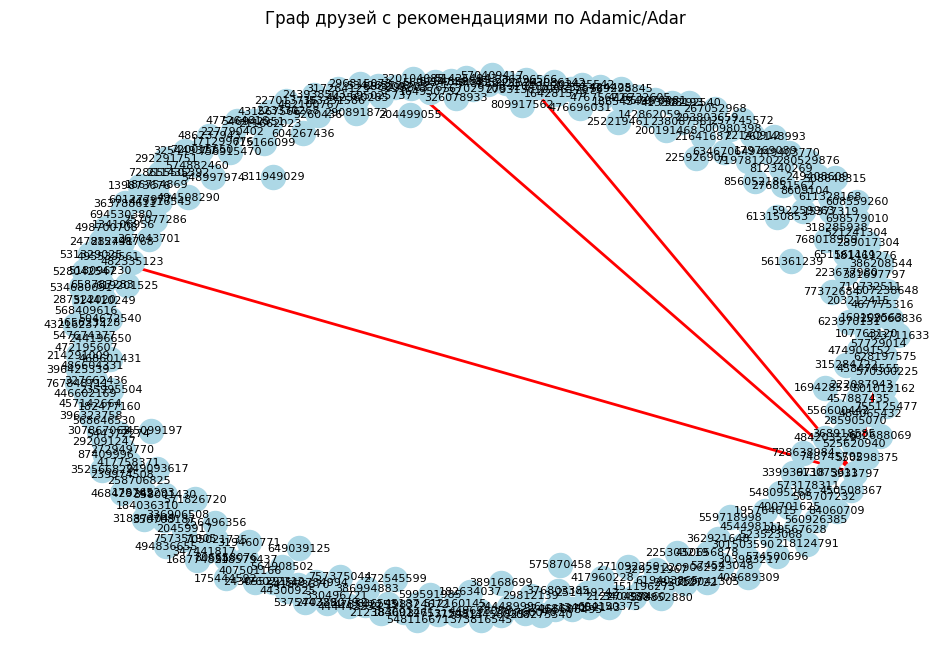

In [ ]:
import vk_api
import networkx as nx
import matplotlib.pyplot as plt

# Токен доступа
token = 'vk1.a.Uiw_uktKrJ-PE-ZWiU1b14hFIU8FM3zk8oRBsFsrGpQ6qdUczbpDNTGC2FrODKc23yzWnfTzZtQvpOGGW2AsmjH2_TrS8Dw76vO0RW0NPmJe45_eFdqM2BVsHaNlOdKhAt8hixFF8PXzWXaqWQDSq2Icw_yk-hcWVHFVD7kF3l9kcVp5-HJlX3Q9EYWte8Q_3gAZKnhn__2CQobbGazC8w'

# Авторизация через токен
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

# Получение списка друзей
friends = vk.friends.get(fields=['city', 'universities'])['items']

# Создание графа
G = nx.Graph()

# Добавление вершин в граф (друзей)
for friend in friends:
    user_id = friend['id']
    name = f"{friend.get('first_name', '')} {friend.get('last_name', '')}"
    G.add_node(user_id, label=name)

# Добавление ребер между друзьями, которые также являются друзьями друг друга
N = 50  # Ограничение для API запросов

for friend in friends[:N]:
    user_id = friend['id']
    try:
        mutual_friends = vk.friends.getMutual(target_uid=user_id)
        for mutual_friend_id in mutual_friends:
            if G.has_node(mutual_friend_id):
                G.add_edge(user_id, mutual_friend_id)
    except vk_api.exceptions.ApiError as e:
        print(f"Ошибка: {e}")
        continue

# Adamic/Adar Recommendation
adamic_adar_scores = []
for node in G.nodes():
    non_friends = set(G.nodes) - set(G.neighbors(node)) - {node}
    for other in non_friends:
        score = sum(1 / (G.degree(w)) for w in nx.common_neighbors(G, node, other))
        adamic_adar_scores.append((node, other, score))

# Сортировка по убыванию метрики и выбор топ-5
recommendations = sorted(adamic_adar_scores, key=lambda x: x[2], reverse=True)[:5]

# Вывод рекомендаций
print("Топ-5 рекомендаций по Adamic/Adar:")
for node, other, score in recommendations:
    print(f"Рекомендация: {G.nodes[other]['label']} (ID: {other}), метрика: {score:.4f}")

# Визуализация графа с рекомендациями
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Отображение вершин и ребер
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

# Выделение рекомендаций цветными ребрами
for node, other, score in recommendations:
    if G.has_node(node) and G.has_node(other):
        nx.draw_networkx_edges(
            G, pos,
            edgelist=[(node, other)],
            edge_color='red',
            width=2
        )

plt.title("Граф друзей с рекомендациями по Adamic/Adar")
plt.axis('off')
plt.show()